## Final Project Submission

Please fill out:
* Student name: Teresia Ndung'u
* Student pace: Full-time Remote.
* Scheduled project review date/time: 
* Instructor name: Mr.William Okomba
* Blog post URL:

In [177]:
# Your code here - remember to use markdown cells for comments as well!

**#Project Title: Aviation Accident Analysis; Understanding Aviation Accident Severity Through Data to Inform Preventative Actions.**

**##Objectives**


Objective: To conduct a comprehensive analysis of the Aviation Data to uncover patterns, trends, and the factors that could have contributed to the severity of outcomes based on weather conditions, aircraft characteristics, and location, which influence the likelihood of severe or fatal accidents.



Project Goal: This project aims to generate actionable insights that support aviation safety improvements, inform regulatory policies, and aid in preventing future accidents by targeting key risk areas identified through the data.

In [178]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
#Reading the file: Loading the AviationData.csv and displaying the first 5 rows
df = pd.read_csv('AviationData.csv', encoding='latin-1', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [180]:
#Checking the last 5 columns of the dataset.
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [181]:
# Check number of rows and columns
print (f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 88889 rows and 31 columns


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

The output from this code shows the 31 columns and their names. The dataset has a total of 88889 rows which implies that most of the columns have some missing values. For instance, column 'Schedule' has 12,582 rows, meaning that it has 85.85% missing values.

In [183]:
#making a copy of the dataframe
df1= df

In [184]:
#I want to see the names of the columns of the dataset
df1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [185]:
# I removed the periods from column names that separated multi-word names.
df1.columns = df1.columns.str.replace(".", "_")
df1.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [186]:
#I decided to put the column names in lower case
df1.columns =df1.columns.str.lower()
df1.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

In [187]:
#Removing the white space
df1.columns = df1.columns.str.replace(" ", "_")
df1.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

In [188]:
#I checked for duplicates
df1.duplicated().sum()

0

This code shows that the dataset has no duplicates 

In [189]:
#Checking the null values per column and the data types.
pd.DataFrame({ 'Missing Values': df1.isna().sum(),'Data Type':df1.dtypes})

,Missing Values,Data Type
event_id,0,object
investigation_type,0,object
accident_number,0,object
event_date,0,object
location,52,object
country,226,object
latitude,54507,object
longitude,54516,object
airport_code,38757,object
airport_name,36185,object


The output shows that event_id, investigation_type, accident_number, and event_date had no missing values.  The remaining columns had some missing values. 

# **Data Cleaning**

## 1.Univariate Visualizations

I decided to drop columns that had more than 50 percent missing values, including far_description, schedule, air_carrier, latitude, and longitude. 

In [190]:
#Dropping the missing columns that had more than 80% missing values, that is, air_carrier and schedule.
#I dropped latitudes and longitudes since I will not use them for my analysis

df1.drop(columns= ['schedule', 'air_carrier','latitude','longitude'], inplace=True)

In [191]:
#Further, I decided to drop the columns that I would not need in my analysis. 
#Such columns included airport_code, airport_name, publication_date, broad_phase_of_flight
df1.drop(columns= ['airport_code', 'broad_phase_of_flight','airport_name', 'publication_date'], inplace=True)

In [192]:
#Renaming the model and make column
df1.rename(columns={"make": "aircraft_make", "model": "aircraft_model"}, inplace = True)
df1.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'aircraft_make',
       'aircraft_model', 'amateur_built', 'number_of_engines', 'engine_type',
       'far_description', 'purpose_of_flight', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'report_status'],
      dtype='object')

In [193]:
pd.DataFrame({ 'Missing Values': df1.isna().sum(),'Data Type':df1.dtypes})

,Missing Values,Data Type
event_id,0,object
investigation_type,0,object
accident_number,0,object
event_date,0,object
location,52,object
country,226,object
injury_severity,1000,object
aircraft_damage,3194,object
aircraft_category,56602,object
registration_number,1382,object


In [194]:
#Filling the specific categorical columns with 'Unknown'
categorical_columns = [
    "location", "country", "injury_severity", "aircraft_damage",
    "aircraft_category", "registration_number", "aircraft_make",
    "aircraft_model", "amateur_built", "engine_type",
    "purpose_of_flight", "weather_condition", "report_status", "far_description"
]
df1[categorical_columns] = df1[categorical_columns].fillna("Unknown")


I filled in the specific categorical columns with "unknown" since they cannot be filled in using the mode.
Such columns include,
1. location
2. country
3. injury_severity
4. aircraft_damage
5. aircraft_category
6. registration_number
7. aircraft_make
8. aircraft_model
9. amateur_built
10. engine_type
11. purpose_of_flight
12. weather_condition
13. report_status
14. far_description

In [195]:
pd.DataFrame({ 'Missing Values': df1.isna().sum(),'Data Type':df1.dtypes})

,Missing Values,Data Type
event_id,0,object
investigation_type,0,object
accident_number,0,object
event_date,0,object
location,0,object
country,0,object
injury_severity,0,object
aircraft_damage,0,object
aircraft_category,0,object
registration_number,0,object


In [196]:
#number_of_engines value counts
df1["number_of_engines"].value_counts()

number_of_engines
1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: count, dtype: int64

In [197]:
#Filling in the nulls for the number_of_engines with the mode of the 'number_of_engines.
engine_mode= df1.number_of_engines.mode()[0]
print(engine_mode)
df1["number_of_engines"] = df1["number_of_engines"].fillna(engine_mode)
pd.DataFrame({ 'Missing Values': df1.isna().sum(),'Data Type':df1.dtypes})

1.0


,Missing Values,Data Type
event_id,0,object
investigation_type,0,object
accident_number,0,object
event_date,0,object
location,0,object
country,0,object
injury_severity,0,object
aircraft_damage,0,object
aircraft_category,0,object
registration_number,0,object


In [198]:
#Fill in the nulls of the injury columns with 0 since we are dealing with people. 
injury_columns = ["total_fatal_injuries","total_serious_injuries","total_minor_injuries","total_uninjured"]
df1[injury_columns] = df1[injury_columns].fillna(0)
pd.DataFrame({ 'Missing Values': df1.isna().sum(),'Data Type':df1.dtypes})

,Missing Values,Data Type
event_id,0,object
investigation_type,0,object
accident_number,0,object
event_date,0,object
location,0,object
country,0,object
injury_severity,0,object
aircraft_damage,0,object
aircraft_category,0,object
registration_number,0,object


<Axes: >

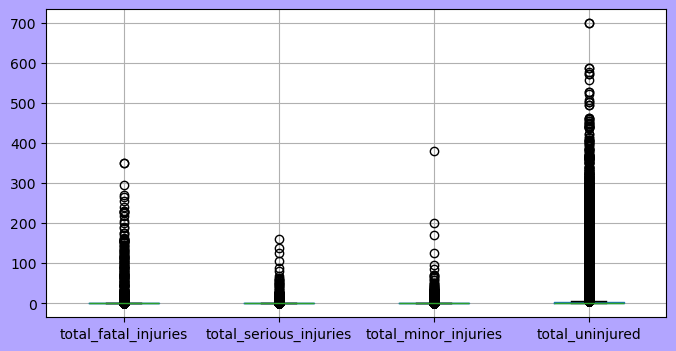

In [199]:
#Checking for outliers on the injury columns
plt.figure(figsize=(8, 4), facecolor="#B2A5FF")
df1[injury_columns].boxplot()

I checked the outliers for the injury columns, and they had some outliers. 
After a second thought,  I decided to retain the data as aviation accidents are real-life events. 
Most of these values may be valid, especially in the case of a crash of a big aircraft. 

In [200]:
df1.duplicated().sum()

0

In [201]:
df.head()

,event_id,investigation_type,accident_number,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,registration_number,...,number_of_engines,engine_type,far_description,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,report_status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Unknown,NC6404,...,1.0,Reciprocating,Unknown,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unknown,N5069P,...,1.0,Reciprocating,Unknown,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Unknown,N5142R,...,1.0,Reciprocating,Unknown,Personal,3.0,0.0,0.0,0.0,IMC,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Unknown,N1168J,...,1.0,Reciprocating,Unknown,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Unknown,N15NY,...,1.0,Unknown,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause


In [202]:
#This column needs some cleaning since it has 110 subcategories. See the output below.
#I want to split the base injury severity. for instance, separating Fatal from Fatal (1) . 
df1["injury_severity"].value_counts()

injury_severity
Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(80)         1
Fatal(217)        1
Fatal(169)        1
Fatal(88)         1
Fatal(189)        1
Name: count, Length: 110, dtype: int64

In [203]:
df1["injury_severity_cleaned"] = df1["injury_severity"].str.split("(").str[0]
Injury_SeverityCleaned_Counts = df1["injury_severity_cleaned"].value_counts()
print(Injury_SeverityCleaned_Counts)

injury_severity_cleaned
Non-Fatal      67357
Fatal          17826
Incident        2219
Unknown         1000
Minor            218
Serious          173
Unavailable       96
Name: count, dtype: int64


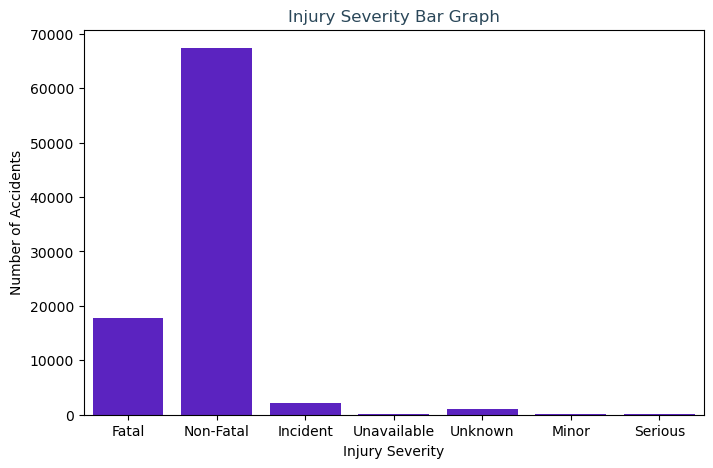

In [204]:
plt.figure(figsize=(8,5))
sns.countplot(x="injury_severity_cleaned", data=df1, color="#5409DA")
plt.title("Injury Severity Bar Graph", color="#2A4759")
plt.xlabel("Injury Severity")
plt.ylabel("Number of Accidents")
plt.show()

The output shows that non-fatal accidents were the majority, followed by fatal accidents. 

In [205]:
#aircraft_damage categories
df1["aircraft_damage"].value_counts()

aircraft_damage
Substantial    64148
Destroyed      18623
Unknown         3313
Minor           2805
Name: count, dtype: int64

engine_type
Reciprocating      69530
Unknown             9147
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64


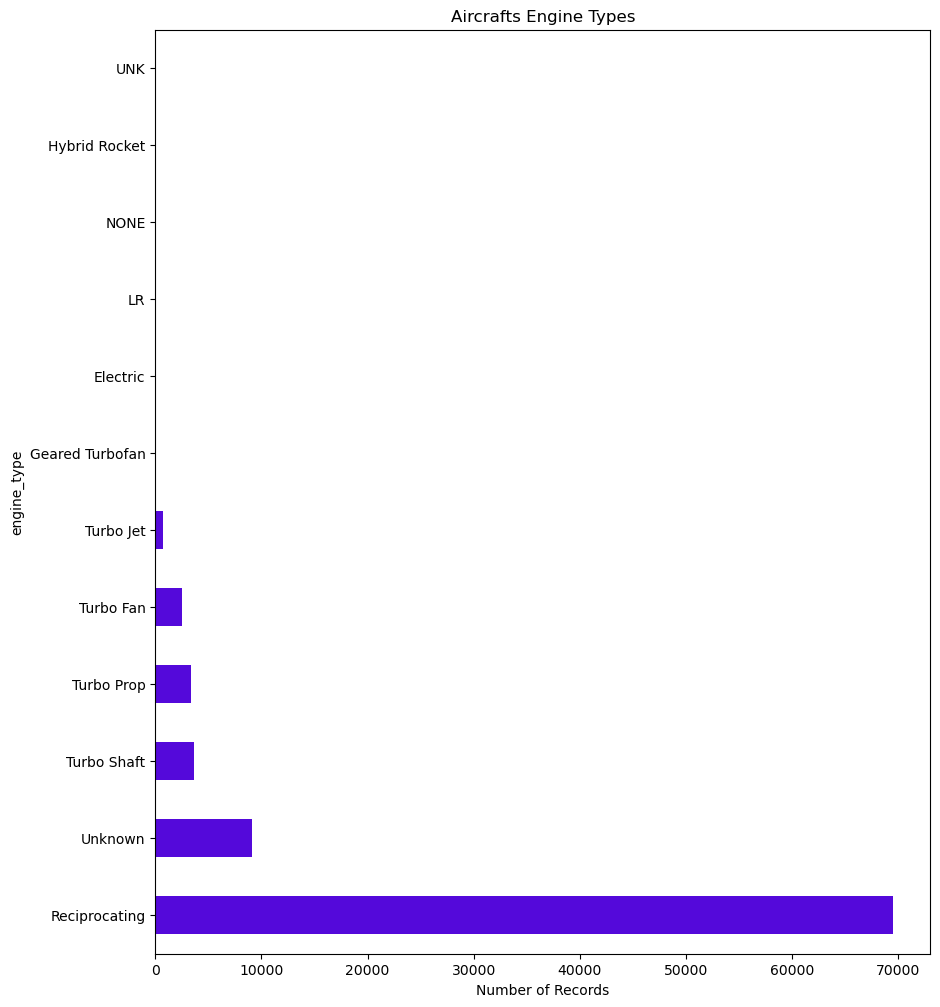

In [206]:
#engine_type categories
Engine_Type_Counts = df1["engine_type"].value_counts()
print(Engine_Type_Counts)
df1["engine_type"] = df1["engine_type"].replace({"NONE": "Unknown", "UNK": "Unknown"})

Engine_Type_Counts.plot(kind='barh', figsize=(10, 12),color="#5409DA")
plt.title("Aircrafts Engine Types")
plt.xlabel("Number of Records")
plt.show()


Reciprocating engines are the majority, followed by Turbo-based engines, Turbo Prop and Turbo Fans. The output also shows that 4437 engine types were unknown. 

In [207]:
#location categories
df1["location"].value_counts()

location
ANCHORAGE, AK       434
MIAMI, FL           200
ALBUQUERQUE, NM     196
HOUSTON, TX         193
CHICAGO, IL         184
                   ... 
MALLARDS LDG, GA      1
LODGEPOLE, MT         1
VERNILLION, SD        1
MCMECHEN, WV          1
Brasnorte,            1
Name: count, Length: 27758, dtype: int64

For the location column, i decided to split the location into city and the state. 

In [208]:
#Splitting location into city and state for all the rows that have a comma
df1[['city', 'state']] = df1["location"].str.split(",", n=1, expand=True)

# Clean resulting columns
df1['city'] = df1['city'].str.strip()
df1['state'] = df1['state'].str.strip()
df1["city"] = df1["city"].str.title()
df1["state"] = df1["state"].str.title()
df1["city"].value_counts()

city
Anchorage      548
Houston        283
Miami          283
Albuquerque    265
Chicago        256
              ... 
Cassoday         1
Aliquippa        1
Hanston          1
Remer            1
Brasnorte        1
Name: count, Length: 16558, dtype: int64

In [209]:
pd.DataFrame({ 'Missing Values': df1.isna().sum(),'Data Type':df1.dtypes})

,Missing Values,Data Type
event_id,0,object
investigation_type,0,object
accident_number,0,object
event_date,0,object
location,0,object
country,0,object
injury_severity,0,object
aircraft_damage,0,object
aircraft_category,0,object
registration_number,0,object


In [210]:
#Cleaning up "state"
# Capitalize
df1["state"] = df1["state"].str.upper()

# Fill missing
df1["state"] = df1["state"].fillna("UNKNOWN")

# Filter valid US states only (optional)
us_states = [
    'AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD',
    'MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC',
    'SD','TN','TX','UT','VT','VA','WA','WV','WI','WY','DC'
]

df1 = df1[df1["state"].isin(us_states + ["UNKNOWN"])]

df1 = df1[df1["state"].isin(us_states + ["UNKNOWN"])]
df1["state"].value_counts()

state
CA         8857
TX         5913
FL         5825
AK         5672
AZ         2834
CO         2725
WA         2611
IL         2060
MI         2030
GA         2023
NY         1914
OH         1823
PA         1790
OR         1772
NC         1660
MO         1565
WI         1560
AR         1519
MN         1456
ID         1436
NM         1358
UT         1336
IN         1320
VA         1275
OK         1240
NV         1236
LA         1216
NJ         1170
AL         1153
TN         1108
KS         1104
MT         1050
SC          974
MA          969
IA          819
MD          815
MS          813
WY          739
NE          725
KY          650
ND          561
UNKNOWN     560
ME          505
CT          502
HI          476
SD          446
WV          394
NH          368
VT          241
RI          158
DE          114
DC           42
Name: count, dtype: int64

In [211]:
df1["state"].isna().sum()

0

In [212]:
df1["aircraft_make"].value_counts()

aircraft_make
Cessna                   21662
Piper                    11724
CESSNA                    4243
Beech                     4188
PIPER                     2492
                         ...  
University Of Alabama        1
Joseph A. Grimaud            1
Alvin R. Kemmet              1
William J. Knowles           1
ROYSE RALPH L                1
Name: count, Length: 7990, dtype: int64

In [213]:
df1["aircraft_make"] = df1["aircraft_make"].str.title()
Top_Makes = df1["aircraft_make"].value_counts().head(30)
Top_Makes

aircraft_make
Cessna                 25905
Piper                  14216
Beech                   5075
Bell                    2327
Boeing                  1508
Mooney                  1295
Grumman                 1148
Bellanca                1040
Robinson                 920
Hughes                   874
Schweizer                749
Air Tractor              644
Aeronca                  635
Maule                    577
Champion                 514
Mcdonnell Douglas        475
Stinson                  439
Luscombe                 413
Aero Commander           400
Taylorcraft              382
De Havilland             378
North American           373
Aerospatiale             359
Hiller                   345
Rockwell                 337
Enstrom                  285
Douglas                  231
Robinson Helicopter      224
Grumman American         223
Ayres                    218
Name: count, dtype: int64

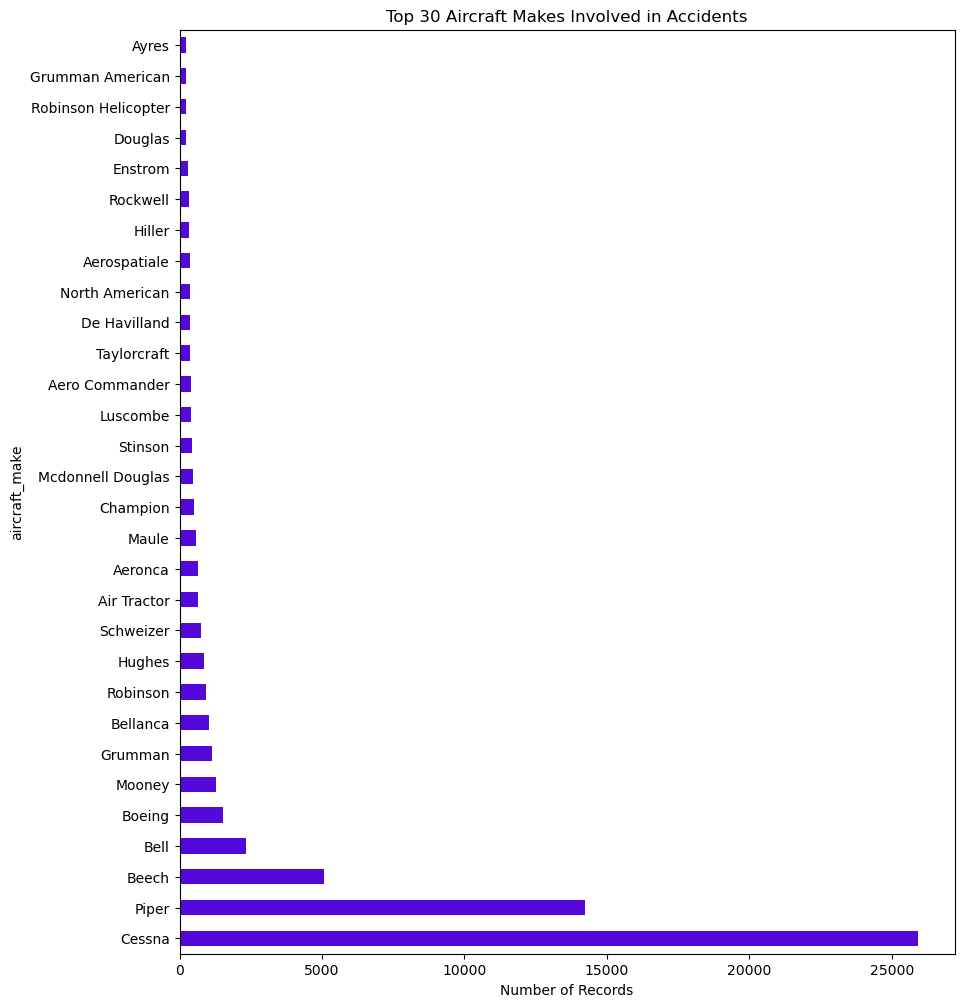

In [214]:
Top_Makes.plot(kind='barh', figsize=(10, 12),color="#5409DA")
plt.title("Top 30 Aircraft Makes Involved in Accidents")
plt.xlabel("Number of Records")
plt.show()

investigation_type
Accident    80114
Incident     2368
Name: count, dtype: int64


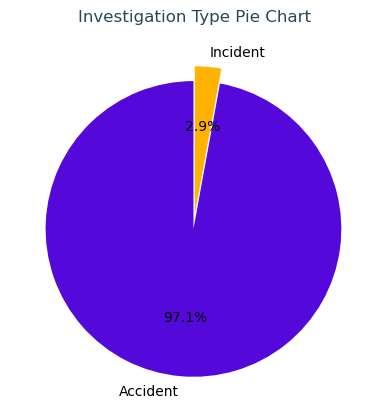

In [215]:
#investigation_type column categories examination. 
investigation_type_count=df1["investigation_type"].value_counts()
print(investigation_type_count)
plt.title("Investigation Type Pie Chart", color="#2A4759")

plt.pie(investigation_type_count, labels = investigation_type_count.index, autopct= '%1.1f%%', startangle=90,colors = ("#5409DA", "#FFB200"), explode= [0.1,0.0]);

The pie chart shows that 97.1% of the aviation accidents were "accidents" while only 2.9% were incidents. This implies that 97.1% of the accidents were serious, had significant effects such as a high number of injuries and fatalities

In [216]:
#amateur_built value counts
df1["amateur_built"].value_counts()

amateur_built
No         74139
Yes         8319
Unknown       24
Name: count, dtype: int64

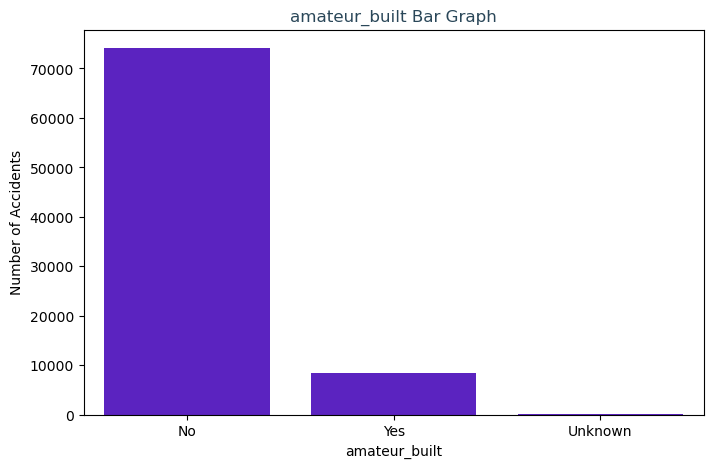

In [217]:
plt.figure(figsize=(8,5))
sns.countplot(x="amateur_built", data=df1, color="#5409DA")
plt.title("amateur_built Bar Graph", color="#2A4759")
plt.xlabel("amateur_built")
plt.ylabel("Number of Accidents")
plt.show()

The plot shows that the aircrafts involved in an accident and were built by an amateur were 74139, while those that were built by a non-amateur were 8319 while 24 aircrafts were from unknown amateur. 

In [218]:
#far_description
#Eventually, I decided to drop the far_description column even though
#I wanted to use it for my analysis. It was a bit messy
#df1["far_description"].value_counts()
df1.drop(columns = ['far_description'], inplace=True)

purpose_of_flight
Personal                     48582
Instructional                10438
Unknown                       8279
Aerial Application            4626
Business                      3860
Positioning                   1576
Other Work Use                1195
Ferry                          761
Aerial Observation             727
Public Aircraft                687
Executive/corporate            512
Flight Test                    389
Skydiving                      169
External Load                  110
Banner Tow                      99
Public Aircraft - Federal       98
Air Race show                   82
Public Aircraft - Local         73
Public Aircraft - State         62
Air Race/show                   57
Glider Tow                      52
Firefighting                    29
Air Drop                         8
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64


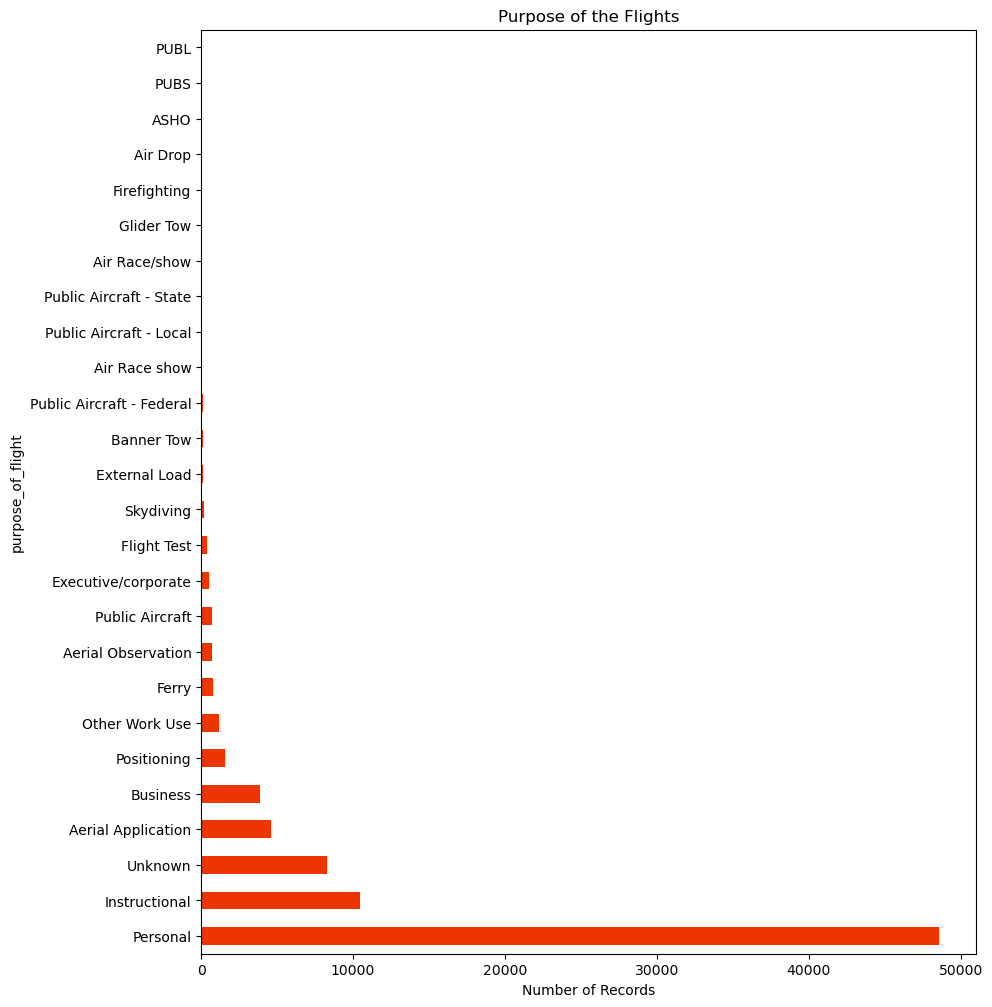

In [219]:
#purpose_of_flight
Purpose_of_the_Flight_counts = df1["purpose_of_flight"].value_counts()
print(Purpose_of_the_Flight_counts )

Purpose_of_the_Flight_counts .plot(kind='barh', figsize=(10, 12),color="#ED3500")
plt.title("Purpose of the Flights")
plt.xlabel("Number of Records")
plt.show()


The majority of aviation accidents occurred during personal flights (48,582), highlighting higher risks in private or recreational flying. Instructional (10,438) and unknown purpose (8,279) flights followed, indicating training-related risks. Operational uses like aerial application and business flights also contributed significantly. Less frequent activities such as skydiving and firefighting showed lower counts but may involve unique hazards. Public aircraft flights were rare but present.

In [220]:
#report_status cleaning of the subcategories

def clean_report_status(val):
    val = str(val).strip().lower()
    if "probable cause" in val:
        return "Probable Cause"
    if "factual" in val:
        return "Factual Cause"
    if "foreign" in val:
        return "Foreign Cause"
    if val in {"unknown", "unk", ""}:
        return "Unknown"
    return "Narrative"

df1["report_status_cleaned"] = df1["report_status"].apply(clean_report_status)
df1["report_status_cleaned"].value_counts()


report_status_cleaned
Probable Cause    61572
Narrative         18111
Unknown            2576
Factual Cause       142
Foreign Cause        81
Name: count, dtype: int64

In [221]:
df1["report_status"].isna().sum()

0

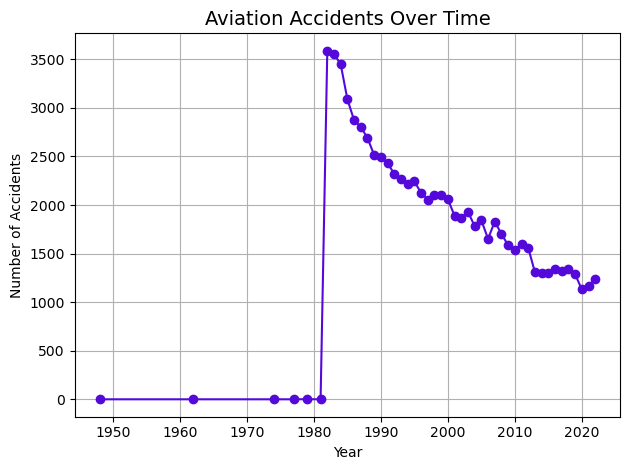

In [222]:
#event_date Accidents visualization
df1["event_date"] = pd.to_datetime(df1["event_date"], errors="coerce")
df1["event_year"] = df1["event_date"].dt.year
yearly_counts = df1["event_year"].value_counts().sort_index()

df1["event_date"].value_counts()

yearly_counts.plot(kind='line', marker='o', color='#5409DA')
plt.title("Aviation Accidents Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.tight_layout()
plt.show()


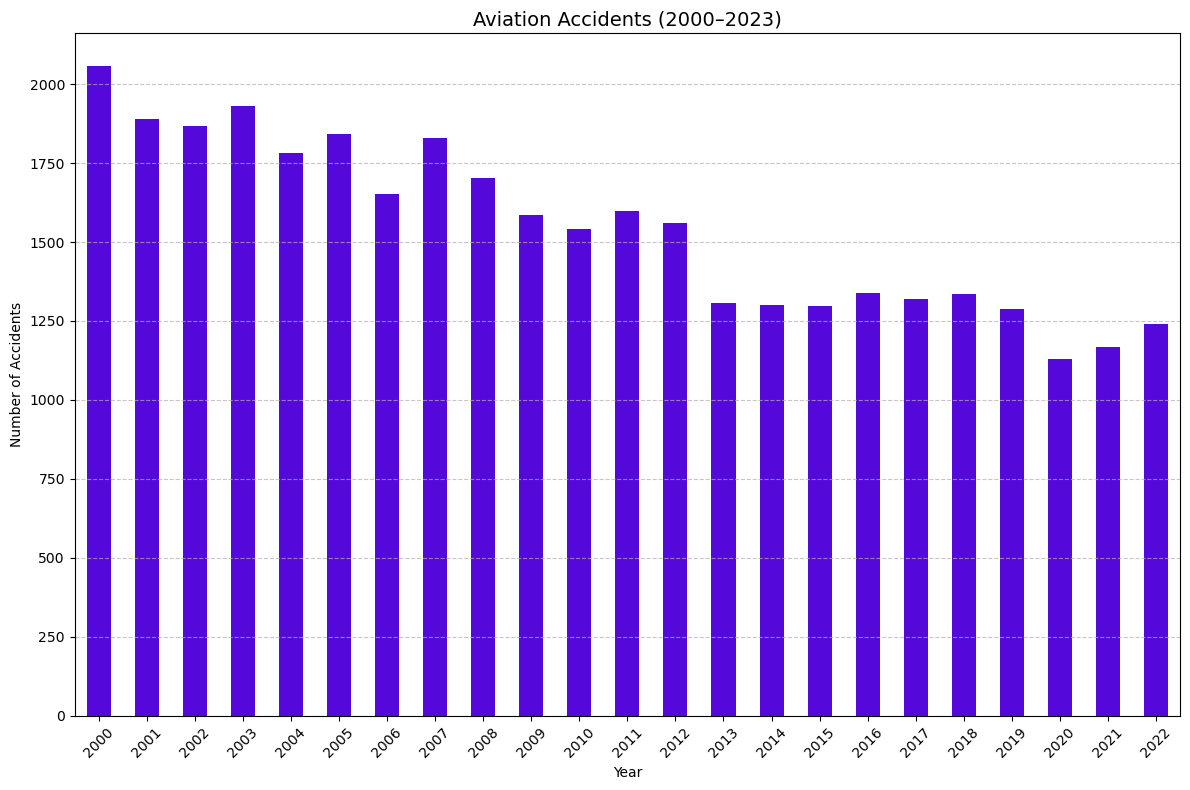

In [223]:
#A bar graph for aviation accidents years 2000 to 2023
filtered_df = df1[(df1["event_year"] >= 2000) & (df1["event_year"] <= 2023)]

accidents_per_year = filtered_df["event_year"].value_counts().sort_index()

plt.figure(figsize=(12, 8))
accidents_per_year.plot(kind='bar', color="#5409DA")
plt.title("Aviation Accidents (2000–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bar graph shows the distribution of injury severity. The bar graph shows that non-fatal accidents were the majority, followed by fatal accidents. 

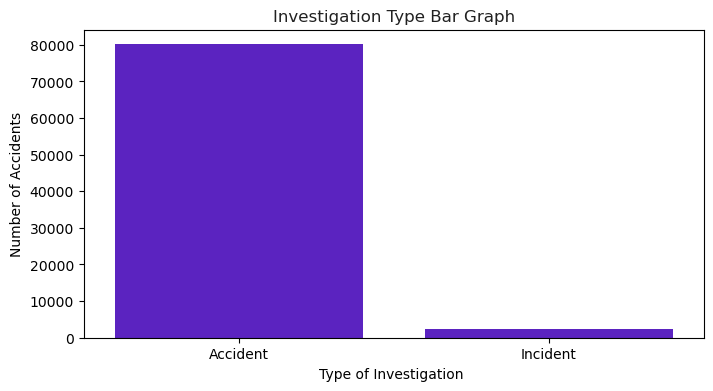

In [224]:
plt.figure(figsize=(8,4))
sns.countplot(x="investigation_type", data=df1, color="#5409DA")
plt.title("Investigation Type Bar Graph", color="#212121")
plt.xlabel("Type of Investigation ")
plt.ylabel("Number of Accidents")
plt.show()

The bar graph shows that most of the aviation accidents were "accidents".

weather_condition
VMC        75510
IMC         5628
Unknown     1344
Name: count, dtype: int64


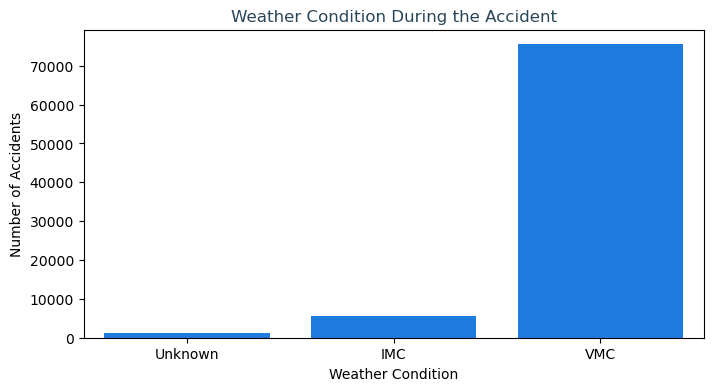

In [225]:
#I want to clean the weather_condition column by renaming "Unk" to "UNK"
#weather_condition categories _cleaned
df1["weather_condition"]=df1["weather_condition"].str.replace('Unk',"UNK")

# Standardize unknowns to "UNKnown"
df1["weather_condition"] = df1["weather_condition"].replace({"UNK": "UNKnown"})

df1["weather_condition"] = df1["weather_condition"].replace("UNKnown", "Unknown")

#Univariate Visualization for the weather_Condition
weather_condition_counts=df1["weather_condition"].value_counts()
print(weather_condition_counts)


plt.figure(figsize=(8,4))
sns.countplot(x="weather_condition", data=df1, color="#0079FF")
plt.title("Weather Condition During the Accident", color="#2A4759")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.show()

Visual Meteorological Conditions (VMC) refer to clear weather, which is exceptionally safe for flying.
Instrument Meteorological Conditions (IMC) refer to poor weather conditions, which mostly entail fog, clouds, and rain. This kind of weather is not suitable for flying. 
The Unknown category refers to the unspecified or missing weather data due to incomplete reporting.
The bar chart shows that most of the accidents occured when the weather was clear and safe for flying. 

fatal_injury_category
None      67379
Low       12403
Medium     2380
High        249
Severe       71
Name: count, dtype: int64


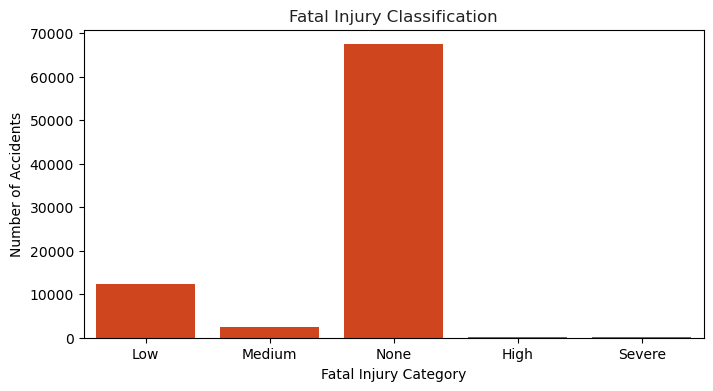

In [226]:
#Fatal Injuries visuals
def categorize_fatalities(x):
    if x == 0:
        return "None"
    elif x <= 2:
        return "Low"
    elif x <= 5:
        return "Medium"
    elif x <= 10:
        return "High"
    else:
        return "Severe"

df1["fatal_injury_category"] = df1["total_fatal_injuries"].apply(categorize_fatalities)
fatal_injury_category_counts = df1["fatal_injury_category"].value_counts()
print(fatal_injury_category_counts)
plt.figure(figsize=(8,4))
sns.countplot(x="fatal_injury_category", data=df1, color="#ED3500")
plt.title("Fatal Injury Classification", color="#212121")
plt.xlabel("Fatal Injury Category")
plt.ylabel("Number of Accidents")
plt.show()


The above output shows that 76% of the accidents had no fatalities. Based on these results, we can conclude that most of the aviation accidents are non-fatal. 14% of these accidents were classified as low, while 2.7% were classified as medium. High and severe accidents were rare and they constituted 0.4%.
Accidents do occur, and most of them do not lead to loss of life. However, there is a need to investigate the small fraction of cases with high fatal consequences.

## 2.Bivariate Analysis

**1. Injury Severity Versus Weather Condition**

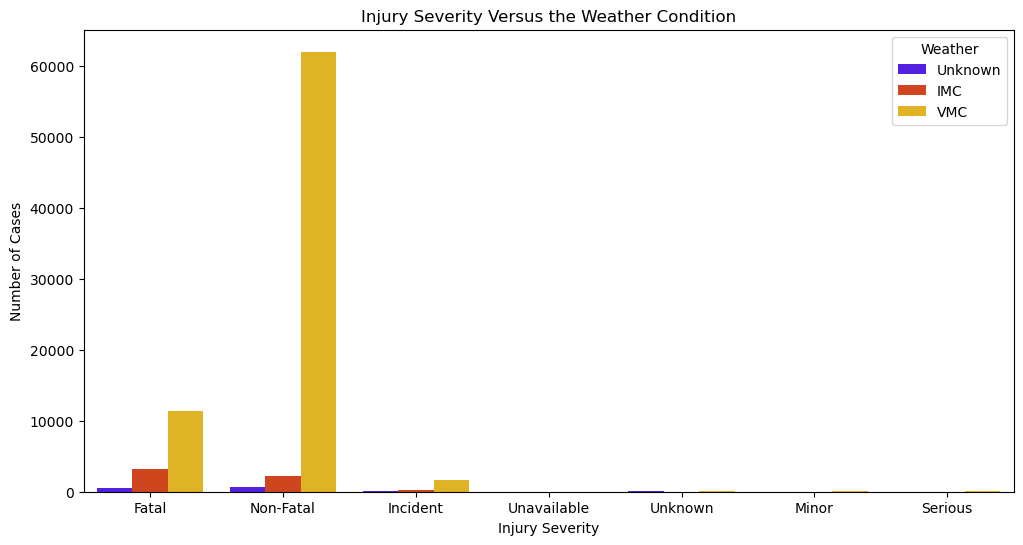

In [227]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x="injury_severity_cleaned", hue="weather_condition", palette=("#4300FF", "#ED3500", "#FFC107"))
plt.title("Injury Severity Versus the Weather Condition")
plt.xlabel("Injury Severity")
plt.ylabel("Number of Cases")
plt.legend(title="Weather")
plt.show()

The above plot of injury severity versus the weather conditions has revealed that the Visual Meteorological Conditions (VMC), which refers to clear weather and most preferred for flying, has the highest number of non-fatal accidents. 

**2. Injury Severity Versus Engine Types**

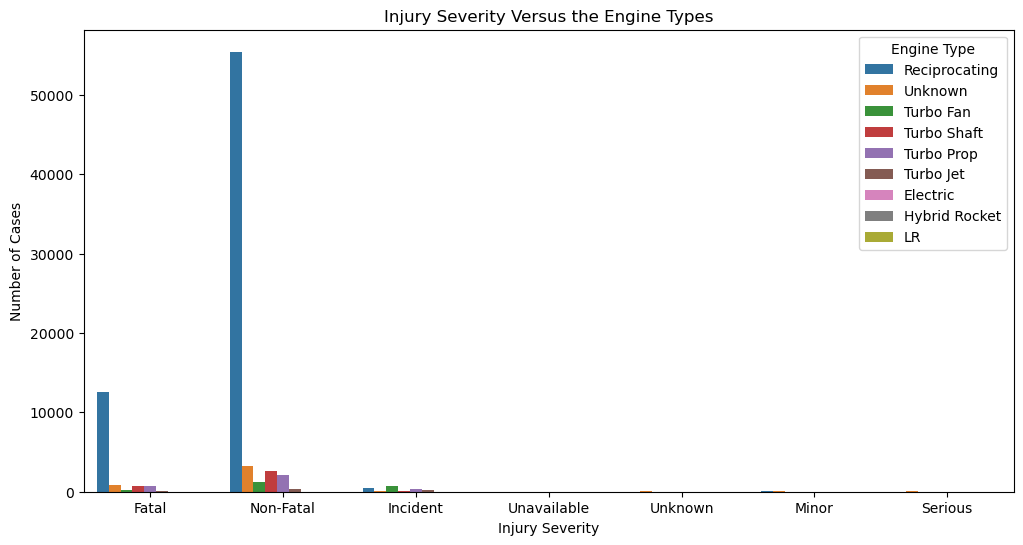

In [228]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x="injury_severity_cleaned", hue="engine_type")
plt.title("Injury Severity Versus the Engine Types")
plt.xlabel("Injury Severity")
plt.ylabel("Number of Cases")
plt.legend(title="Engine Type")
plt.show()

The output shows that the Reciprocating engines were the most in both fatal and non-fatal injury severity.   the majority, followed by Turbo-based engines, Turbo Prop and Turbo Fans. 

**3.  Injury Severity Versus Purpose of Flight.**

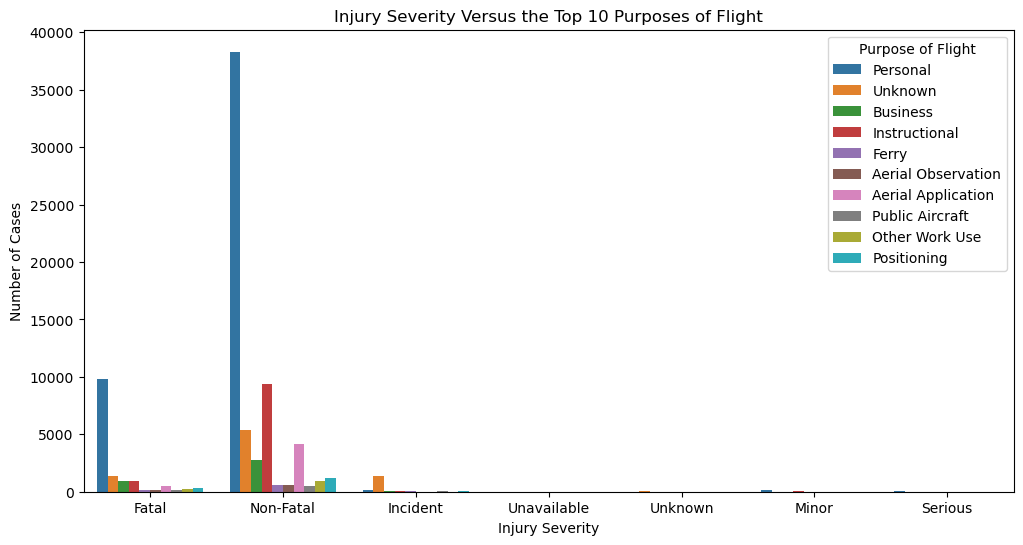

In [229]:
#The purpose of flight column had several categories, so I chose to filter the top 10 categories

top10_purposes = df1["purpose_of_flight"].value_counts().head(10).index
filtered_df = df1[df1["purpose_of_flight"].isin(top10_purposes)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x="injury_severity_cleaned", hue="purpose_of_flight")
plt.title("Injury Severity Versus the Top 10 Purposes of Flight")
plt.xlabel("Injury Severity")
plt.ylabel("Number of Cases")
plt.legend(title="Purpose of Flight")
plt.show()

The bar plot shows that personal flights recorded the highest number of accidents for the fatal and non-fatal injury severity. This shows that personal use of aviation poses a greater risk. 
Notably, instructional flights had a high number of non-fatal injuries severity. Instructional flights are learning environments hence, the injury severity is expected to be low.
Further, aerial aircraft had a notably high number of non-fatal accidents and very low fatal accidents. Aerial aircraft pilots are highly trained and experienced. The pilots are able to overcome dangerous situations safely. Additionally, the aerial aircraft designs are well-rugged, which significantly reduces the injury severity during crashes. 

**4. A Line Graph of Fatal Injuries Verses Year 2000-2023**

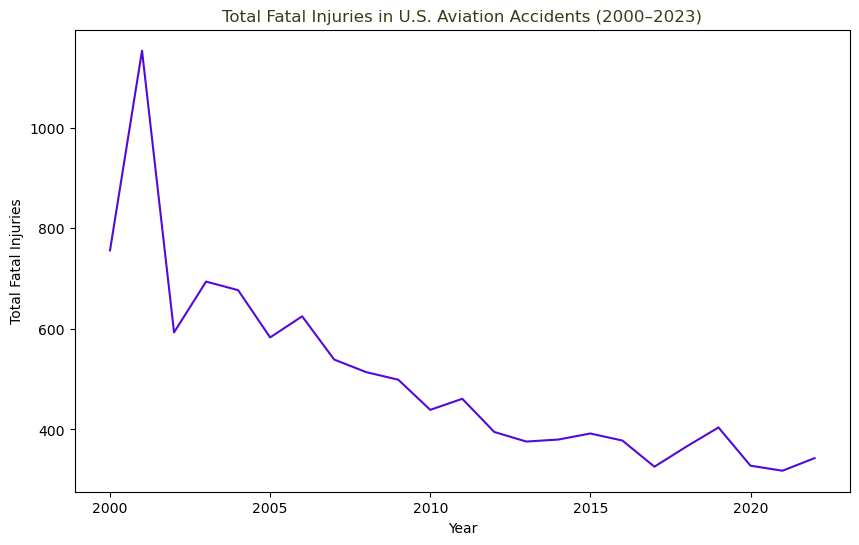

In [230]:
# Grouping by year and sum of the total fatal injuries. 
yearly_fatalities = df1.groupby("event_year")["total_fatal_injuries"].sum()

#I want to visualize for the year 2000 to 2023
yearly_fatalities_filtered = yearly_fatalities.loc[2000:2023]

plt.figure(figsize=(10, 6))
plt.plot(yearly_fatalities_filtered.index, yearly_fatalities_filtered.values, color='#5409DA')
plt.title("Total Fatal Injuries in U.S. Aviation Accidents (2000–2023)", color="#3B3B1A")
plt.xlabel("Year")
plt.ylabel("Total Fatal Injuries")
plt.show()


The line graph of the total fatal injuries of aviation accidents in the US, between 2000 and 2023 have declined steadily over time. The line graph shows that there was a notable high fatalies in 2000. There is a notable steady decline in thee fatal injuries after year 2001 which means that there are great improvements in aviation safety regulations, technology, and training.

**5. A Scatter Plot Graph of Total Serious Injuries Verses Total Fatal Injuries**

Text(0.5, 1.0, 'A Scatter Between Total Serious Injuries and Total Fatal Injuries')

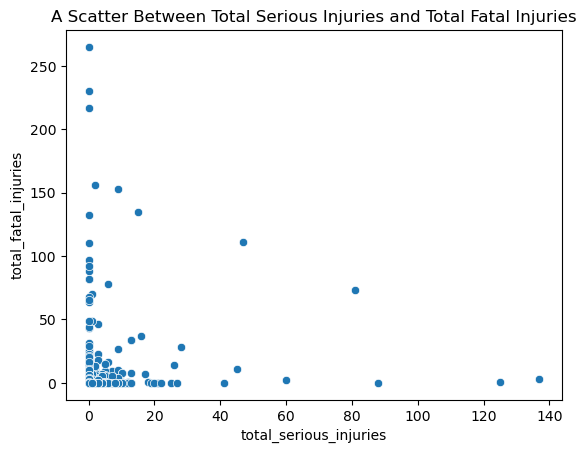

In [231]:
sns.scatterplot(data=df1, x="total_serious_injuries", y="total_fatal_injuries")
plt.title("A Scatter Between Total Serious Injuries and Total Fatal Injuries")

The above scatterplot shows that there is no clear linear relationship between serious injuries and fatal injuries since the data points are quite spread. Therefore, there is no strong correlation between the number of serious injuries and fatal injuries. A high number of serious injuries does not necessarily mean a high number of fatal injuries.

## 3.Multi-Variate Analysis

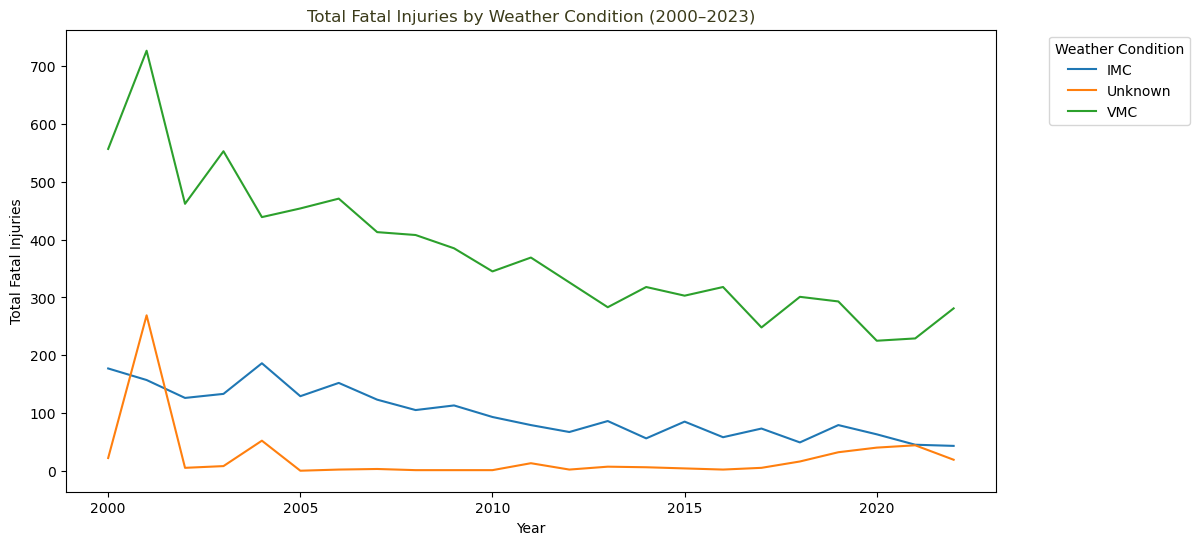

In [232]:
# Grouping by year and engine_type, summing fatal injuries
multi_year_weather = df1[df1["event_year"].between(2000, 2023)].groupby(["event_year", "weather_condition"])["total_fatal_injuries"].sum().unstack()

# Plot
multi_year_weather.plot(kind="line", figsize=(12, 6))
plt.title("Total Fatal Injuries by Weather Condition (2000–2023)", color="#3B3B1A")
plt.xlabel("Year")
plt.ylabel("Total Fatal Injuries")
plt.legend(title="Weather Condition", bbox_to_anchor=(1.05, 1), loc='upper left',)
plt.show()


The above line graph illustrates the total number of fatal injuries by weather condition between 2000 and 2023.
Even though Visual Meteorological Conditions (VMC) is considered the most suitable weather for flying, it had the highest number of fatal injuries in 2000 and 2023 compared to Instrument Meteorological Conditions (IMC), which had a lower total number of fatal injuries. IMC weather conditions are very unfavorable for pilots because of low visibility.
Interestingly, I expected the IMC to have the highest number of fatal injuries per year. However, according to our data, most of the accidents occur during the VMC when there is a high  volume of flights, which increases accidents exposure. Additionally, IMC flights are operated by experienced pilots who observe strict flying protocols. 

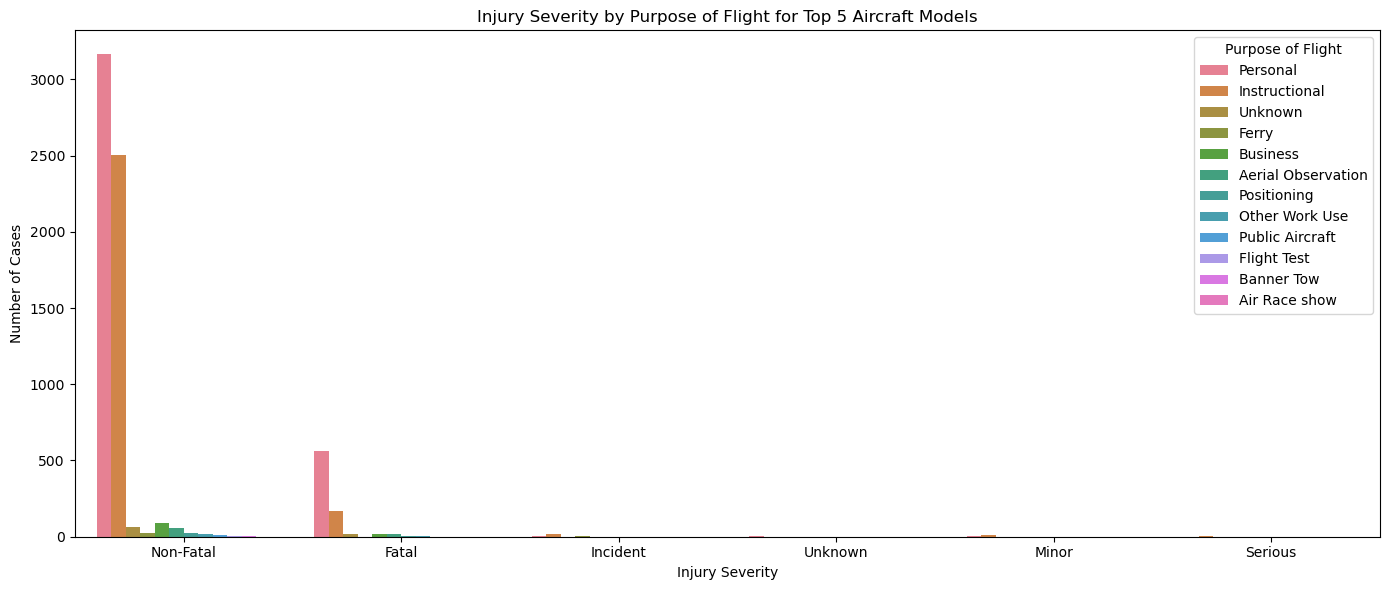

In [233]:
# Filter for top aircraft models
top_models = df1["aircraft_model"].value_counts().head(5).index
filtered_df = df1[df1["aircraft_model"].isin(top_models)]

# Plot
plt.figure(figsize=(14, 6))
sns.countplot(
    data=filtered_df,
    x="injury_severity_cleaned",
    hue="purpose_of_flight"
)
plt.title("Injury Severity by Purpose of Flight for Top 5 Aircraft Models")
plt.xlabel("Injury Severity")
plt.ylabel("Number of Cases")
plt.legend(title="Purpose of Flight")
plt.tight_layout()
plt.show()


A bar graph of the Injury Severity by Purpose of Flight for Top 5 Aircraft Models shows the number of aviation cases categorized by the severity of injury (Non-Fatal, Fatal, Incident, Unknown, Minor, Serious) and broken down by the purpose of the flight (e.g., Personal, Instructional, Business). The data is aggregated for the top 5 most common aircraft models.
The vast majority of reported cases fall under the "Non-Fatal" injury category, significantly outnumbering all other categories combined.
Personal Use: Flights for "Personal" reasons account for the highest number of cases across the two most severe categories. They are the leading cause of both "Non-Fatal" incidents (over 3,000 cases) and "Fatal" incidents (approximately 550 cases).
Flights for "Instructional" purposes are the second leading contributor to both "Non-Fatal" (approx. 2,500 cases) and "Fatal" 

In [234]:
df1.to_csv("cleaned_dataset.csv", index=False)